### Assignment 1 Algerian_Forest_Fire

Sudeep Bhattarai (C0905601)

Github link: https://github.com/sudeepbhattaraiae/Algerian-forest-fire

In [1]:
!pip install scikit-learn


## Understanding DataSet
244 instances that combine data from two regions of Algeria—the Sidi Bel-abbes region in the northwest and the Bejaia region in the northeast—are included in the collection.


For every region, there are 122 instances.



the time frame of June–September 2012.

There are 14 attributes in the dataset, along with one output attribute (class).

The 244 instances have been divided into two kinds: fire (138 classes) and non-fire (106 classes).



## Features in the dataset
1. day - Day
2. month - Month
3. year - Year which is 2012
4. Temperature - temperature noon (temperature max) in Celsius degrees: 22 to 42
5. RH - Relative Humidity in %: 21 to 90
6. Ws - Wind speed in km/h: 6 to 29
7. Rain - total day in mm: 0 to 16.8
8. FFMC - Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
9. DMC - Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
10. DC - Drought Code (DC) index from the FWI system: 7 to 220.4
11. ISI - Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
12. BUI - Buildup Index (BUI) index from the FWI system: 1.1 to 68
13. FWI - Fire Weather Index (FWI) Index: 0 to 31.1
14. Classes - Classes: two classes, namely fire and not fire.
15. Region - region: 2 region represented in the form of 0 and 1


In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# from sklearn.pipeline import make_pipeline
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# loading the data
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Data cleaning

In [4]:
# Looking the distribution of the data in each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [5]:
# Deleting the columns that are not needed
df = df.drop('year', axis=1)

In [6]:
# checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       243 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


+ There is no null value in the dataset and all the columns are numerical data type except classes.

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# unique values in the classes column
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [9]:
df['Classes'] = df['Classes'].replace(['fire   ', 'fire ', 'not fire   ', 'not fire ', 'not fire     ', 'not fire    '], ['fire', 'fire', 'not fire', 'not fire', 'not fire', 'not fire'])

In [10]:
# counting the unique values in the Classes column
df['Classes'].value_counts(0)

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [11]:
# Replacing the categorical values into numeric using LabelEncoder

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Classes' column
df['Classes'] = label_encoder.fit_transform(df['Classes'])

# Printing the updated DataFrame
df['Classes'].unique()

array([1, 0])

## Data visualization

In [12]:
# Setting style for plots
sns.set(style="whitegrid")

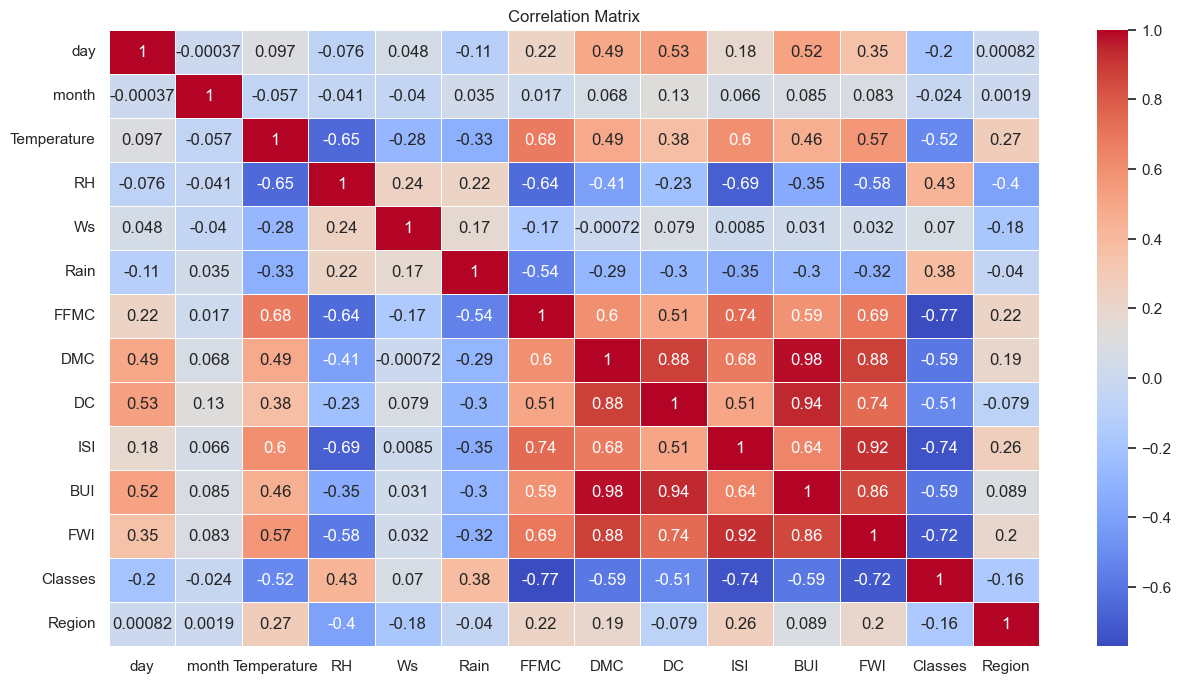

In [13]:
# Correlation matrix to understand relationships between variables 
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

+ Features like DMC and BUI, FWI AND ISI, and DC and DMC have a strong positive association, while features like temperature and RH, classes and FFMC, classes and ISI, classes and FWI, RH and ISI, and classes and ISI have a strong negative correlation.


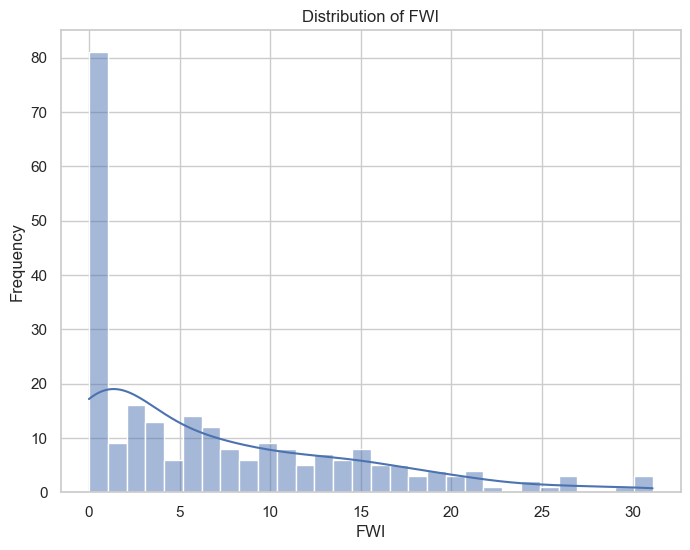

In [15]:
# Distribution of the target variable (FWI)
plt.figure(figsize=(8, 6))
sns.histplot(df['FWI'], kde=True, bins=30)
plt.title('Distribution of FWI')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

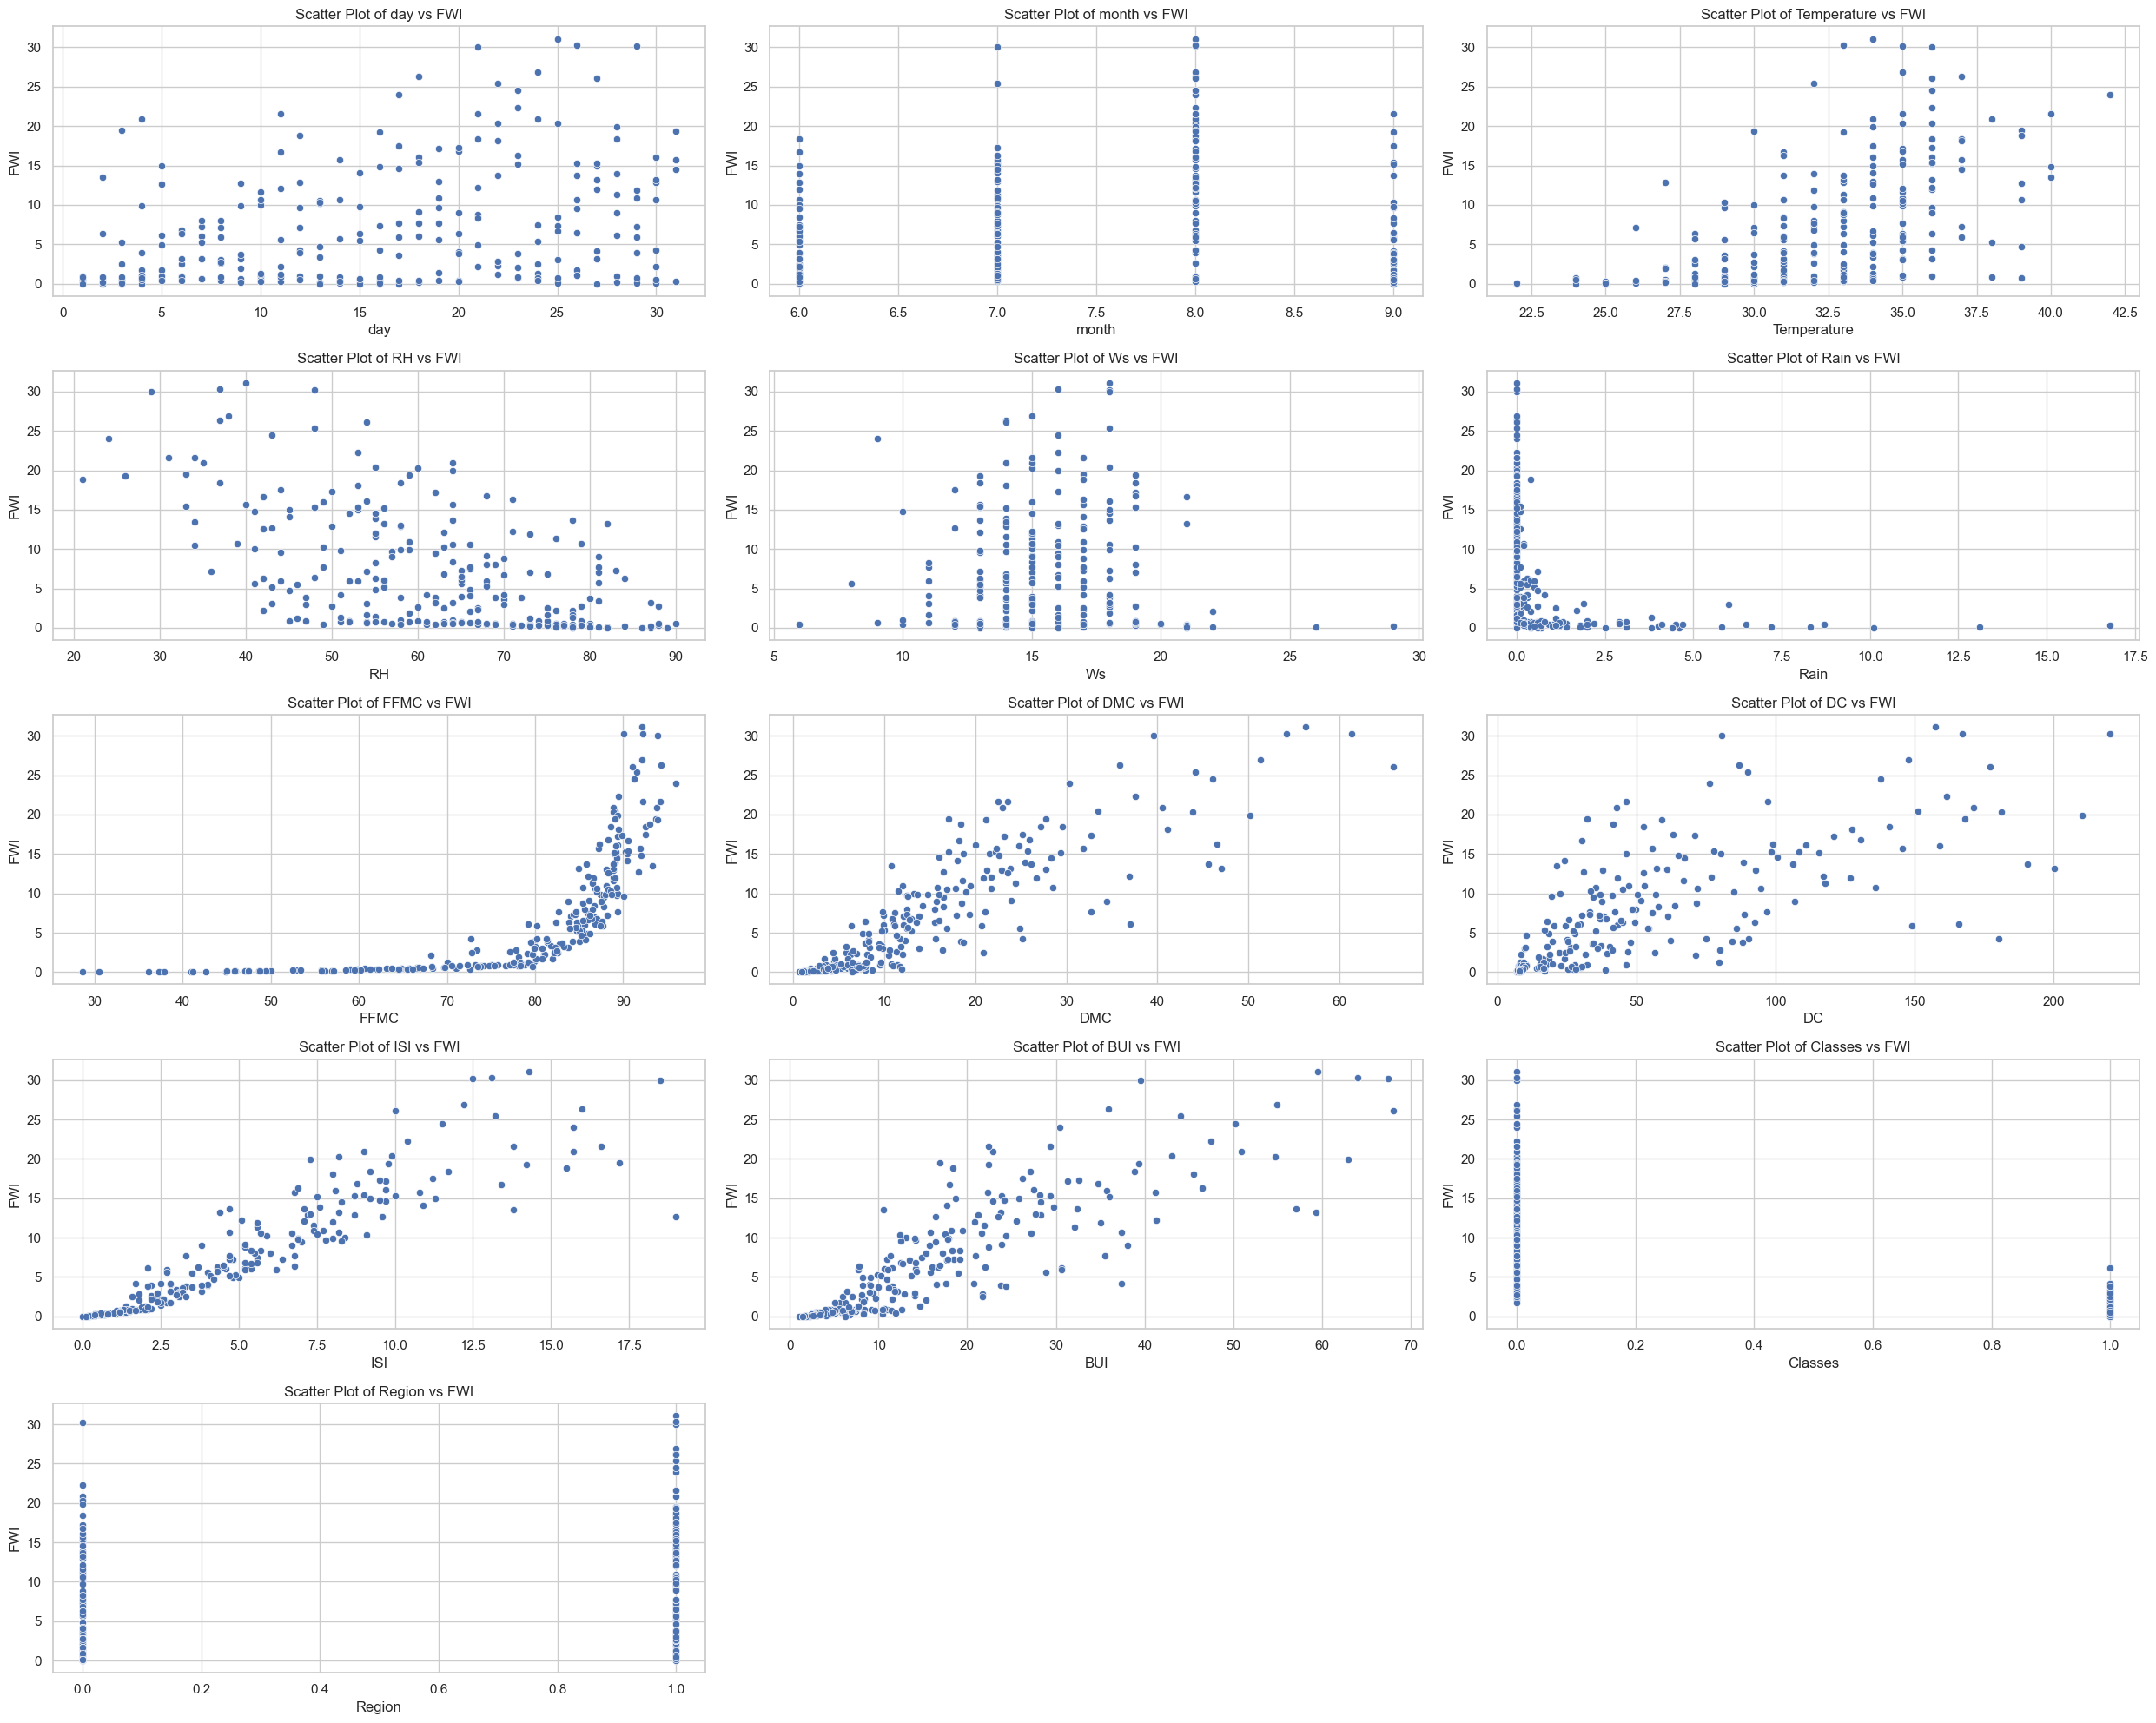

In [17]:
# Setting plot size
plt.figure(figsize=(25, 20))

# List of independent variables (all columns except the target)
independent_vars = df.columns[df.columns != 'FWI']

# Loop through each independent variable and plot
for i, col in enumerate(independent_vars, 1):
    plt.subplot(5, 3, i)  # Adjust the grid size based on the number of variables (4x3 in this case)
    sns.scatterplot(x=df[col], y=df['FWI'])
    plt.title(f'Scatter Plot of {col} vs FWI')
    plt.xlabel(col)
    plt.ylabel('FWI')

plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

+ For the target variable, months and region have little to no significance.

In [18]:
# removing the features "Region", "month" as they are not needed
df = df.drop(['Region', 'month'], axis=1)

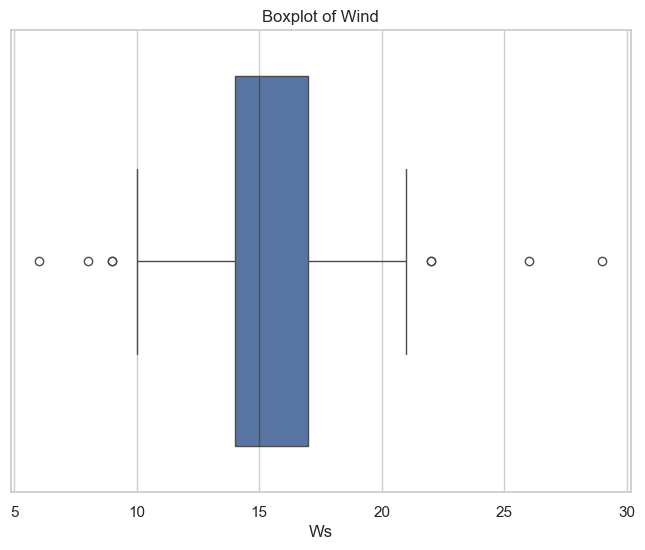

In [20]:
# Boxplot to check for outliers in features (e.g.- wind)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Ws'])
plt.title('Boxplot of Wind')
plt.show()

In [21]:
df.corr()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840
Temperature,0.097227,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015
RH,-0.076034,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161
Ws,0.047812,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964
Rain,-0.112523,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097
FFMC,0.224956,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492
DMC,0.491514,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658
DC,0.527952,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123
ISI,0.180543,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197
BUI,0.517117,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639


In [22]:
# listing the important features for the target variable 'FWI'. 
df.corr()['FWI'].sort_values(ascending=False)

FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
FFMC           0.691132
Temperature    0.566670
day            0.350781
Ws             0.032368
Rain          -0.324422
RH            -0.580957
Classes       -0.719216
Name: FWI, dtype: float64

### Building Model and evaluation

In [23]:
# Define features (X) and target (y)
X = df.drop('FWI', axis=1)  # All features except FWI
y = df['FWI']  # Target variable

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

## Standardization

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Multiple Linear Regression

In [27]:
# Initialize and fit the multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))

Linear Regression R²: 0.9892824621557071
Mean Squared Error: 0.3248316543310571


## Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial regression model
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))

Polynomial Regression R²: 0.9964087046714774
Mean Squared Error: 0.10884649251568686


## Regularization (Ridge and Lasso)

In [29]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Ridge model
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))

# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate Lasso model
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))


Ridge Regression R²: 0.9834119584573949
Lasso Regression R²: 0.9822611207506413


## Model Evaluation and Testing


## Cross-Validation & Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Define the pipeline that includes PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Step 1: Create polynomial features
    ('linear', LinearRegression())  # Step 2: Apply linear regression
])

# Define parameter grid for GridSearchCV (for the degree of PolynomialFeatures)
param_grid = {'poly__degree': [2, 3, 4]}  # We use the 'poly__degree' to reference the degree parameter in the pipeline

# Perform GridSearchCV
poly_cv = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
poly_cv.fit(x_train_scaled, y_train)  # Fit the pipeline on scaled training data

# Best hyperparameters (degree of the polynomial)
print("Best parameters for Polynomial Regression:", poly_cv.best_params_)

# Evaluate the best model
best_poly_model = poly_cv.best_estimator_
y_pred_best_poly = best_poly_model.predict(X_test_scaled)

# Evaluate the performance
print("Best Polynomial Regression R²:", r2_score(y_test, y_pred_best_poly))

Best parameters for Polynomial Regression: {'poly__degree': 2}
Best Polynomial Regression R²: 0.9964087046714774


## Saving, Loading Models with Pickle

In [31]:
import pickle

# Save the linear regression  with polynomial features model to a pickle file
with open('poly_model.pkl', 'wb') as file:
    pickle.dump(poly_cv, file)
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(poly_cv, file)
# save the standard scaler  to a pickle file
with open('stdscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [32]:
# load the standard scaler from a pickle file
with open('stdscaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Load the model from the pickle file
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

test_data = pd.DataFrame({
    'day': [10, 20, 30],
    'Temperature': [32, 25, 39],
    'RH': [70, 45, 56],
    'Ws': [12, 20, 27],
    'Rain': [8.8, 7.3, 1.2],
    'FFMC': [20, 56, 88],
    'DMC': [11.4, 34.7, 23.7],
    'DC': [190.3, 112.1, 35.5],
    'ISI': [2.0, 8.0, 16.0],
    'BUI': [16.3, 34.2, 48.2],
    'Classes': [0.0, 0.0, 1.0]
})

# Test the loaded model on unseen data
test_data_scaled = loaded_scaler.transform(test_data)
y_pred_loaded = loaded_model.predict(test_data_scaled)
print("Predicted FWI values:", y_pred_loaded)


Predicted FWI values: [-19.58901978  -3.70675659  57.83444214]
